# Notebook supporting feature engineering and eda of training set

In [138]:
import pandas as pd

In [139]:
train_df: pd.DataFrame = pd.read_csv('../data/train.csv')
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Numeric columns explorations

- Quite a lot of outliers, especially on max side
- Values on different scales

#### Replace text content (string values) with numerical one

In [140]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [141]:
for col in train_df.columns:
    if pd.api.types.is_string_dtype(train_df[col].dtype):
        train_df[col] = pd.factorize(train_df[col])[0]

train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,0,65.0,8450,0,-1,0,0,0,...,0,-1,-1,-1,0,2,2008,0,0,208500
1,2,20,0,80.0,9600,0,-1,0,0,0,...,0,-1,-1,-1,0,5,2007,0,0,181500
2,3,60,0,68.0,11250,0,-1,1,0,0,...,0,-1,-1,-1,0,9,2008,0,0,223500
3,4,70,0,60.0,9550,0,-1,1,0,0,...,0,-1,-1,-1,0,2,2006,0,1,140000
4,5,60,0,84.0,14260,0,-1,1,0,0,...,0,-1,-1,-1,0,12,2008,0,0,250000


# Nulls and uniqueness

- 17 columns with null values
- Strategy to fill missing values needed
- Features differ a lot in number of unique values
- Some features could benefit from values grouping (years, area)

In [142]:
train_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [143]:
train_df.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

#### Put year values into bins

YearBuilt       1872
YearRemodAdd    1950
dtype: int64
YearBuilt       2010
YearRemodAdd    2010
dtype: int64


<AxesSubplot:>

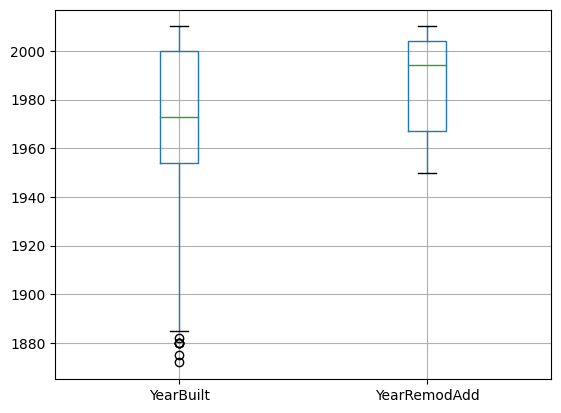

In [144]:
print(train_df[['YearBuilt', 'YearRemodAdd']].min())
print(train_df[['YearBuilt', 'YearRemodAdd']].max())

train_df.boxplot(column=['YearBuilt', 'YearRemodAdd'])

In [145]:
# Arbitrary bin values. Could be calculated within deeper analysis

train_df['YearBuilt'] = pd.qcut(train_df['YearBuilt'], q=10, labels=False, precision=0)
train_df['YearRemodAdd'] = pd.qcut(train_df['YearRemodAdd'], q=8, labels=False, precision=0)

train_df[['YearBuilt', 'YearRemodAdd']].head()

,YearBuilt,YearRemodAdd
0,7,5
1,5,2
2,7,5
3,0,2
4,7,4


## Description of features

In [146]:
train_df.describe()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.00000,1460.000000
mean,730.500000,56.897260,0.340411,70.049958,10516.828082,0.004110,-0.909589,0.408219,0.195205,0.000685,...,2.758904,-0.989726,-0.667123,-0.956849,43.489041,6.321918,2007.815753,0.234932,0.35000,180921.195890
std,421.610009,42.300571,0.798309,24.284752,9981.264932,0.063996,0.372151,0.582296,0.642010,0.026171,...,40.177307,0.158916,0.793316,0.245984,496.123024,2.703626,1.328095,0.804553,0.88787,79442.502883
min,1.000000,20.000000,0.000000,21.000000,1300.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,2006.000000,0.000000,0.00000,34900.000000
25%,365.750000,20.000000,0.000000,59.000000,7553.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,-1.000000,-1.000000,-1.000000,0.000000,5.000000,2007.000000,0.000000,0.00000,129975.000000
50%,730.500000,50.000000,0.000000,69.000000,9478.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,-1.000000,-1.000000,-1.000000,0.000000,6.000000,2008.000000,0.000000,0.00000,163000.000000
75%,1095.250000,70.000000,0.000000,80.000000,11601.500000,0.000000,-1.000000,1.000000,0.000000,0.000000,...,0.000000,-1.000000,-1.000000,-1.000000,0.000000,8.000000,2009.000000,0.000000,0.00000,214000.000000
max,1460.000000,190.000000,4.000000,313.000000,215245.000000,1.000000,1.000000,3.000000,3.000000,1.000000,...,738.000000,2.000000,3.000000,3.000000,15500.000000,12.000000,2010.000000,8.000000,5.00000,755000.000000


## Correlation between features

- Should be redone after features grouping
- There are already high correlation between some features

In [147]:
corr: pd.DataFrame = train_df.corr()
corr

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,1.000000,0.011156,-0.011949,-0.010601,-0.033226,-0.008916,-0.000293,-0.024071,0.014769,0.013324,...,0.057044,0.066509,0.005029,-0.014074,-0.006242,0.021172,0.000712,-0.016932,-0.017712,-0.021917
MSSubClass,0.011156,1.000000,0.286937,-0.386347,-0.139781,0.024969,0.179144,-0.115361,-0.018947,-0.022844,...,0.008283,0.010353,-0.080209,-0.016437,-0.007683,-0.013585,-0.021407,0.012874,-0.015047,-0.084284
MSZoning,-0.011949,0.286937,1.000000,-0.248800,-0.161640,0.039678,0.399270,-0.167918,-0.013396,-0.011167,...,-0.029301,-0.027587,-0.074069,-0.029479,-0.021573,0.022231,-0.010621,0.058948,0.068705,-0.116047
LotFrontage,-0.010601,-0.386347,-0.248800,1.000000,0.426095,0.040886,-0.190957,0.231878,0.096766,NaN,...,0.206167,0.219815,0.037457,0.007872,0.003368,0.011200,0.007450,0.006370,0.072517,0.351799
LotArea,-0.033226,-0.139781,-0.161640,0.426095,1.000000,0.197131,-0.083668,0.315484,0.258792,0.010123,...,0.077672,0.093908,-0.030856,0.089707,0.038068,0.001205,-0.014261,-0.013882,0.000199,0.263843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,0.021172,-0.013585,0.022231,0.011200,0.001205,-0.003690,-0.021453,0.026617,0.063280,-0.051552,...,-0.033737,-0.033227,0.011360,0.019292,-0.006495,1.000000,-0.145721,0.040201,0.054679,0.046432
YrSold,0.000712,-0.021407,-0.010621,0.007450,-0.014261,0.025043,-0.012036,-0.037391,-0.026117,0.023353,...,-0.059689,-0.046232,0.012714,0.043235,0.004906,-0.145721,1.000000,-0.021683,-0.123720,-0.028923
SaleType,-0.016932,0.012874,0.058948,0.006370,-0.013882,0.021171,-0.000025,0.001435,-0.014537,0.057455,...,-0.009887,-0.002809,-0.027036,0.014543,-0.014143,0.040201,-0.021683,1.000000,0.232149,0.072896
SaleCondition,-0.017712,-0.015047,0.068705,0.072517,0.000199,0.022919,0.026551,-0.004773,0.062826,0.019173,...,0.068578,0.071651,-0.032209,-0.047231,-0.032655,0.054679,-0.123720,0.232149,1.000000,0.142503


In [148]:
for col in train_df.columns:
    if col in corr:
        col_sorted = corr[col].sort_values(ascending=False)
        print(col_sorted[1])

0.06650900950191323
0.7708396619425061
0.39926967855640855
0.45718100199465517
0.43686801153335103
0.19713093862382264
0.39926967855640855
0.31548403701057776
0.5072032466851077
0.10814052632343978
0.3080734084680183
0.5072032466851077
0.18419776547817274
0.18917211091677272
0.2131228212854523
0.7708396619425061
0.22166334812357918
0.7909816005838053
0.22791158639694706
0.8543245226025341
0.6731444084688052
0.509732518830173
0.509732518830173
0.749599466187403
0.749599466187403
0.10595321497186926
0.47749304709571444
0.5283778807915541
0.2066181784356022
0.41945138520234926
0.3239903117368141
0.26441659387099
0.2839701439448835
0.2684201173897507
0.6492117535742649
0.7351647961785289
0.7351647961785289
0.4153596051815893
0.8195299750050339
0.4290667489995299
0.41945138520234926
0.4290667489995299
0.29404815999672623
0.8195299750050339
0.6875010641666033
0.22166334812357918
0.8254893743088425
0.6492117535742649
0.1190481678808047
0.6300116462511148
0.6097073002717436
0.676619935742649
0